# SixthSense Artifact

Artifact of the paper "SixthSense: Debugging Convergence Problems in Probabilistic
Programs via Program Representation Learning" from FASE'2022.

To access ChameleonCloud resources, you may need the account to log in to ChameleonCloud. You also need to have a project to allocate resources (e.g., node).

In [2]:
from chi import context

context.version = "1.0"

context.choose_site(default="CHI@TACC")
context.choose_project()

### Check available hardware

In [3]:
from chi import hardware

node_type = "compute_cascadelake_r"
available_nodes = hardware.get_nodes(node_type=node_type, filter_reserved=True)
if available_nodes:
    print(f"There currently are {len(available_nodes)} {node_type} nodes ready to use")
else:
    print(f"All {node_type} nodes are in use! You could use next_free_timeslot to see how long you need to wait, or use the calendar.")

There currently are 7 compute_cascadelake_r nodes ready to use


### Reserve node

In [4]:
from chi import lease
from datetime import timedelta
import os

my_lease = lease.Lease(f"{os.getenv('USER')}-power-management", duration=timedelta(hours=3))
my_lease.add_node_reservation(nodes=[available_nodes[0]]) # or you could use node_type=node_type
my_lease.add_fip_reservation(1) # include a floating ip
my_lease.submit(idempotent=True)

Waiting for lease to start... This can take up to 60 seconds


Lease radhofanazizi_gmail_com-power-management has reached status active


### Create a server on the node

In [5]:
from chi import server

my_server = server.Server(
    f"{os.getenv('USER')}-power-management",
    reservation_id=my_lease.node_reservations[0]["id"],
    image_name="CC-Ubuntu22.04", # or use image_name
)
my_server.submit(idempotent=True)

Waiting for server radhofanazizi_gmail_com-power-management's status to become ACTIVE. This typically takes 10 minutes, but can take up to 20 minutes.


Server has moved to status ACTIVE


Attribute,radhofanazizi_gmail_com-power-management
Id,af31697f-f9d5-4496-85a6-4e7ce20826aa
Status,ACTIVE
Image Name,CC-Ubuntu22.04
Flavor Name,baremetal
Addresses,sharednet1: IP: 10.52.3.236 (v4) Type: fixed MAC: bc:97:e1:c4:30:80
Network Name,sharednet1
Created At,2025-03-07T10:32:42Z
Keypair,trovi-0d537ec
Reservation Id,ecd5003c-53fb-4fe5-809d-73d0fd6fe17d
Host Id,b281b13a05d4a4d342f673906de4005142c2819a049809e34ac97306


### Configure networking on the node

In [6]:
fip = my_lease.get_reserved_floating_ips()[0]
my_server.associate_floating_ip(fip)
my_server.check_connectivity(host=fip)

Checking connectivity to 129.114.109.229 port 22.


Connection successful


## Run SixthSense

Now, we can finally run SixthSense. First we need to clone the github repo first and then run the reproduce.sh script which contain the instructions from README.md
packaged into a bash file

In [7]:
my_server.execute("git clone https://github.com/radhofan/sixthsense.git")

/opt/conda/lib/python3.10/site-packages/paramiko/client.py:889: UserWarning: Unknown ssh-ed25519 host key for 129.114.109.229: b'1f68f8c73142619387f500a11bd51ef0'
  warnings.warn(
Cloning into 'sixthsense'...


<Result cmd='git clone https://github.com/radhofan/sixthsense.git' exited=0>

In [8]:
my_server.execute("chmod +x sixthsense/reproduce.sh")
my_server.execute("bash sixthsense/reproduce.sh")

PREFIX=/home/cc/miniconda
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/cc/miniconda

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    conda-25.1.1               |  py312h7900ff3_1         1.1 MB  conda-forge
    fmt-11.0.2                 |       h434a139_0         194 KB  conda-forge
    libexpat-2.6.4             |       h5888daf_0          72 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge


warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
DEPRECATION: --no-python



Transaction

  Prefix: /home/cc/miniconda

  All requested packages already installed


Transaction starting

Transaction finished

To activate this environment, use:

    mamba activate base

Or to execute a single command in this environment, use:

    mamba run -n base mycommand



critical libmamba Cannot activate, prefix does not exist at: '/home/cc/miniconda/envs/sixthsense'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 151.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 73.2 MB/s eta 0:00:00


--2025-03-07 10:43:35--  https://zenodo.org/record/6388301/files/csvs.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/6388301/files/csvs.tar.gz [following]
--2025-03-07 10:43:35--  https://zenodo.org/records/6388301/files/csvs.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60141155 (57M) [application/octet-stream]
Saving to: ‘sixthsense/csvs/csvs.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  170K 5m44s
    50K .......... .......... .......... .......... ..........  0%  394K 4m7s
   100K .......... .......... .......... .......... ..........  0%  393K 3m34s
   150K .......... .......... .......... .......... ..........  0%  395K 3m17s
   200K .......... .......... .......... .......... ....

csvs/timeseries_warmup_runtime_700.csv
csvs/mixture_runtime_70.csv
csvs/mixture_warmup_runtime_700.csv
csvs/timeseries_warmup_runtime_400.csv
csvs/lrm_warmup_runtime_700.csv
csvs/lrm_runtime_60.csv
csvs/mixture_runtime_90.csv
csvs/timeseries_runtime_80.csv
csvs/timeseries_runtime_10.csv
csvs/mixture_runtime_80.csv
csvs/lrm_warmup_runtime_600.csv
csvs/lrm_warmup_runtime_100.csv
csvs/mixture_warmup_runtime_300.csv
csvs/timeseries_warmup_runtime_1000.csv
csvs/mixture_runtime_60.csv
csvs/mixture_runtime_20.csv
csvs/lrm_warmup_runtime_900.csv
csvs/timeseries_runtime_70.csv
csvs/timeseries_runtime_20.csv
csvs/lrm_runtime_70.csv
csvs/timeseries_runtime_90.csv
csvs/timeseries_runtime_50.csv
csvs/lrm_runtime_50.csv
csvs/timeseries_metrics.csv
csvs/timeseries_runtime_100.csv
csvs/mixture_warmup_runtime_600.csv
csvs/timeseries_features.csv
csvs/lrm_warmup_runtime_300.csv
csvs/mixture_warmup_runtime_900.csv
csvs/timeseries_runtime_60.csv
csvs/lrm_features.csv
csvs/mixture_runtime_50.csv
csvs/lrm_r

/home/cc/miniconda/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/home/cc/sixthsense/utils.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data[metric][0])


Namespace(feature_file=['sixthsense/csvs/lrm_features.csv'], feature_other=None, labels_file=['sixthsense/csvs/lrm_metrics.csv'], metric='rhat_min', threshold=None, ignore_vi=True, split_ratio=0.8, split_template_name='lightspeed', split_by_template=True, balance=False, balance_by_weight=True, algorithm='rf', cv=True, cv_template=False, plot=True, validation=False, learning=False, grid=False, metrics_suffix='avg', runtime=False, predict=None, tree=False, train_by_size=False, split_class=None, shuffle=False, saveas='sixthsense/plots/results_rhat_min_lrm.png', feature_select=False, plt_template=False, warmup=False, stratify_data=False, special_index=None, ignore=None, keep=['_ast_', 'dt_', 'var_min', 'var_max', 'data_size'], selected=None, with_noise=False, tfpn=None, allpreds=False, test_features=None, test_labels=None, runtime_iteration=None, train_size=1.0, metric_filter=None, projection_size=None, max_motifs=0, nooverlap=None)
2.6306503
Infinite: 57
Nans: 0
Threshold : 1.05==========

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

{'wells_dae_inter_c': 62, 'earnings_latin_square_chr': 102, 'radon': 102, 'wells_d100ars': 46, 'radon_complete_pool': 132, 'y_x': 118, 'congress': 130, 'radon_no_pool_chr': 133, 'wells_interaction': 30, 'radon_redundant': 82, 'electric_1b_chr': 138, 'flight_simulator_17.3': 128, 'wells_logit': 50, 'pilots_expansion': 89, 'radon.pooling': 121, 'anova_radon_nopred': 124, 'sesame_multi_preds_3b': 109, 'radon_vary_inter_slope_17.2': 71, 'kidscore_momiq': 131, 'radon_no_pool': 118, 'radon_vary_si': 124, 'radon.2': 80, 'radon_inter_vary': 123, 'radon_intercept': 131, 'electric_inter': 127, 'logearn_logheight': 118, 'electric_one_pred': 118, 'wells_dae_c': 76, 'ideo_reparam': 120, 'hiv': 126, 'ideo_interactions': 133, 'kidiq_interaction_c2': 138, 'earnings_vary_si': 138, 'kidiq_interaction_c': 119, 'wells_dae': 30, 'electric_1c': 123, 'mesquite_log': 122, 'hiv_inter_chr': 128, 'sesame_street1': 68, 'logearn_height_male': 120, 'radon_vary_inter_slope_17.1': 125, 'dogs': 64, 'mesquite_volume': 

<Result cmd='bash sixthsense/reproduce.sh' exited=0>

View the plot result



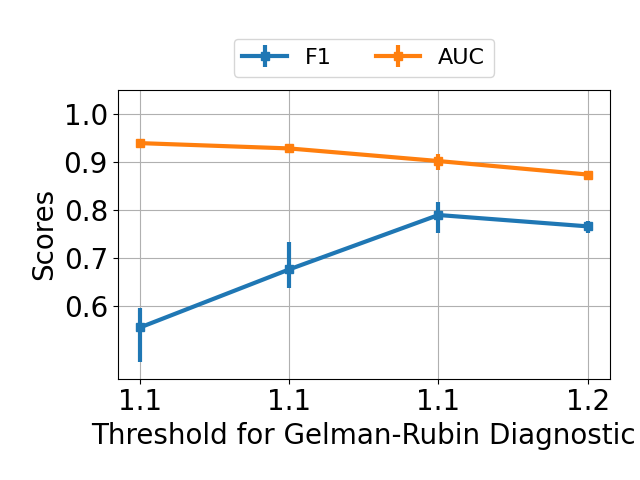

<Result cmd='\npython3 -c \'\nimport base64\n\n# Define the path to the image\nimage_path = "sixthsense/plots/results_rhat_min_lrm.png"\n\n# Read and encode the image as base64\nwith open(image_path, "rb") as f:\n    image_data = f.read()\n    encoded_image = base64.b64encode(image_data).decode("utf-8")\n\n# Print the HTML img tag\nprint(f"<img src=\\"data:image/png;base64,{encoded_image}\\">")\n\'\n' exited=0>

In [33]:
my_server.execute("""
python3 -c '
import base64

# Define the path to the image
image_path = "sixthsense/plots/results_rhat_min_lrm.png"

# Read and encode the image as base64
with open(image_path, "rb") as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode("utf-8")

# Print the HTML img tag
print(f"<img src=\\"data:image/png;base64,{encoded_image}\\">")
'
""")